In [1]:
import os
import glob
import pandas as pd
import itertools

import Bio
from Bio import Entrez, SeqIO
from Bio import AlignIO

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#path_to_bam_file = ""
path_to_bam_file = '/Users/unnost/workwork/prespacers_task/Results_fragseq/Oct14_S10_R1_001_R2_kd403-real_uni_mapped.csv'

In [4]:
PPS_start = 575538
PPS_end = 575570

region_len = 25000

In [5]:
uni_bam_df = pd.read_csv(path_to_bam_file,  sep =' ') #, header=None)
uni_bam_df.head()

,qname,flag,rname,strand,pos,qwidth,mapq,cigar,mrnm,mpos,isize,seq,qual
1,A01492:11:HNH7TDMXX:1:1101:5710:1016,83,KD403,-,4436683,95,60,95M,KD403,4436683,-95,GTAGTATTCGTTATCCGATCCAGGAATGGTCACTTTACCGGTCAGG...,FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF...
2,A01492:11:HNH7TDMXX:1:1101:5710:1016,163,KD403,+,4436683,95,60,95M,KD403,4436683,95,GTAGTATTCGTTATCCGATCCAGGAATGGTCACTTTACCGGTCAGG...,FF:FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF...
3,A01492:11:HNH7TDMXX:1:1101:13630:1016,83,KD403,-,3139284,59,60,59M,KD403,3139284,-59,GACGGTTCTCAACGTTATGCCAGAGCGATTTTTCGGCGTCGTATTG...,FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF...
4,A01492:11:HNH7TDMXX:1:1101:13630:1016,163,KD403,+,3139284,59,60,59M,KD403,3139284,59,GACGGTTCTCAACGTTATGCCAGAGCGATTTTTCGGCGTCGTATTG...,FFFFFFFFFFFFFFFFFFFFF:FFFFFFFFFFFFFFFFFFFFFFFF...
5,A01492:11:HNH7TDMXX:1:1101:17616:1031,99,KD403,+,2198430,96,60,96M,KD403,2198433,96,GATTATCTCCCTGACCTGGTGGTTGCCCAGGAGGAGGGCCGGAAAT...,FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF...


In [6]:
#check a size of df
uni_bam_df.shape

(7013784, 13)

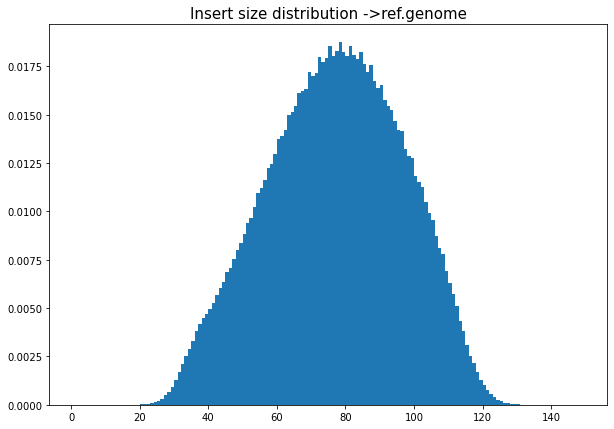

In [10]:
a=[abs(e) for e in list(uni_bam_df["isize"])]

fig=plt.figure(figsize=(10,7))
plt.title(u'Insert size distribution ->ref.genome', fontsize=15)
#plt.hist(a, bins="auto", density = True)
plt.hist(a, bins=range(1,150), density = True)
#plt.xticks([20, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 50])
#plt.legend(loc='upper left')
plt.show(fig)

In [ ]:
#path_to_save = ""
#fig.savefig(path_to_save, dpi=200)

downstream of PPS (25kbp)
=

In [33]:
#create 3 dfs: filter of the region; direct strand; reverse strand 
#pairs of reads are considered

dff_len_isize = pd.DataFrame({'qname': [''], 'flag': [''], 'strand': [''], 'isize': ['']})
dff_len_dir_99_147 = pd.DataFrame({'qname': [''], 'flag': [''], 'strand': [''], 'isize': ['']})
dff_len_dir_83_163 = pd.DataFrame({'qname': [''], 'flag': [''], 'strand': [''], 'isize': ['']})

In [34]:
#25kbp+
k = 0
for m in range(1, uni_bam_df.shape[0]):
    #if uni_bam_df['strand'][m] == '-':
    if "D" or "I" not in uni_bam_df["cigar"]:
        
        #if int(uni_bam_df['pos'][m]) > 575570 and int(uni_bam_df['pos'][m]) < 600670:
        if int(uni_bam_df['pos'][m]) > PPS_end and int(uni_bam_df['pos'][m]) < PPS_start+region_len:
        
            dff_len_isize.loc[k, 'qname'] = uni_bam_df['qname'][m]
            dff_len_isize.loc[k, 'flag'] = uni_bam_df['flag'][m]
            dff_len_isize.loc[k, 'strand'] = uni_bam_df['strand'][m]
            dff_len_isize.loc[k, 'isize'] = uni_bam_df['isize'][m]

            k+=1

In [35]:
dff_len_isize.head()

,qname,flag,strand,isize
0,A01492:11:HNH7TDMXX:1:1101:9561:6934,99,+,36
1,A01492:11:HNH7TDMXX:1:1101:9561:6934,147,-,-36
2,A01492:11:HNH7TDMXX:1:1101:1606:8719,99,+,41
3,A01492:11:HNH7TDMXX:1:1101:1606:8719,147,-,-41
4,A01492:11:HNH7TDMXX:1:1101:10194:24064,99,+,60


In [36]:
k = 0
for m in range(0, dff_len_isize.shape[0]):
    if int(dff_len_isize['flag'][m]) == 147 or int(dff_len_isize['flag'][m]) == 99:
    #if int(uni_bam_df['pos'][m]) > 550538 and int(uni_bam_df['pos'][m]) < 600570:
        #if int(uni_bam_df['qwidth'][m]) < 50:
        dff_len_dir_99_147.loc[k, 'qname'] = dff_len_isize['qname'][m]
        dff_len_dir_99_147.loc[k, 'flag'] = dff_len_isize['flag'][m]
        dff_len_dir_99_147.loc[k, 'strand'] = dff_len_isize['strand'][m]
        dff_len_dir_99_147.loc[k, 'isize'] = dff_len_isize['isize'][m]

        k+=1

In [37]:
dff_len_dir_99_147.head(10)

,qname,flag,strand,isize
0,A01492:11:HNH7TDMXX:1:1101:9561:6934,99,+,36
1,A01492:11:HNH7TDMXX:1:1101:9561:6934,147,-,-36
2,A01492:11:HNH7TDMXX:1:1101:1606:8719,99,+,41
3,A01492:11:HNH7TDMXX:1:1101:1606:8719,147,-,-41
4,A01492:11:HNH7TDMXX:1:1101:10194:24064,99,+,60
5,A01492:11:HNH7TDMXX:1:1101:10194:24064,147,-,-60
6,A01492:11:HNH7TDMXX:1:1102:15456:32863,99,+,56
7,A01492:11:HNH7TDMXX:1:1102:15456:32863,147,-,-56
8,A01492:11:HNH7TDMXX:1:1103:16378:34147,99,+,37
9,A01492:11:HNH7TDMXX:1:1103:16378:34147,147,-,-37


In [38]:
k = 0
for m in range(0, dff_len_isize.shape[0]):
    if int(dff_len_isize['flag'][m]) == 163 or int(dff_len_isize['flag'][m]) == 83:
    #if int(uni_bam_df['pos'][m]) > 550538 and int(uni_bam_df['pos'][m]) < 600570:
        #if int(uni_bam_df['qwidth'][m]) < 50:
        dff_len_dir_83_163.loc[k, 'qname'] = dff_len_isize['qname'][m]
        dff_len_dir_83_163.loc[k, 'flag'] = dff_len_isize['flag'][m]
        dff_len_dir_83_163.loc[k, 'strand'] = dff_len_isize['strand'][m]
        dff_len_dir_83_163.loc[k, 'isize'] = dff_len_isize['isize'][m]

        k+=1

In [39]:
dff_len_dir_83_163.head(10)

,qname,flag,strand,isize
0,A01492:11:HNH7TDMXX:1:1103:11225:6997,83,-,-32
1,A01492:11:HNH7TDMXX:1:1103:11225:6997,163,+,32
2,A01492:11:HNH7TDMXX:1:1104:11912:3145,83,-,-53
3,A01492:11:HNH7TDMXX:1:1104:11912:3145,163,+,53
4,A01492:11:HNH7TDMXX:1:1104:3586:16689,83,-,-86
5,A01492:11:HNH7TDMXX:1:1104:3586:16689,163,+,86
6,A01492:11:HNH7TDMXX:1:1104:2636:35086,83,-,-34
7,A01492:11:HNH7TDMXX:1:1104:2636:35086,163,+,34
8,A01492:11:HNH7TDMXX:1:1105:7943:2754,83,-,-69
9,A01492:11:HNH7TDMXX:1:1105:7943:2754,163,+,69


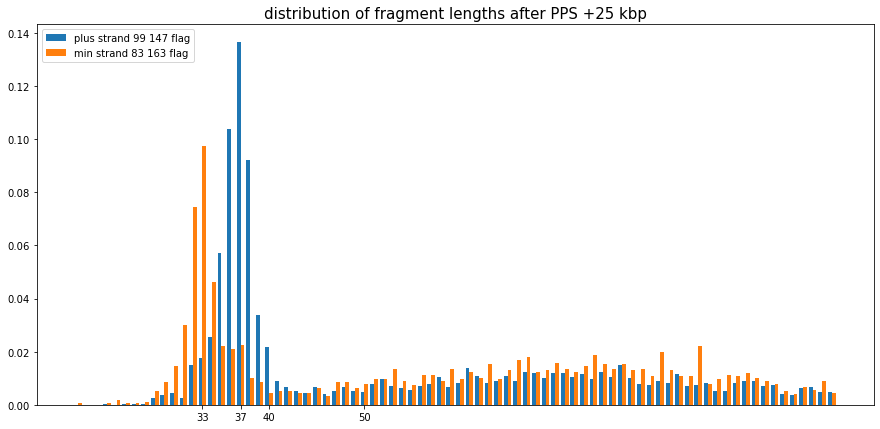

In [40]:
a=[abs(e) for e in list(dff_len_dir_99_147["isize"])]
#b=list(dff_3["isize"])*(+1)
b = [abs(e) for e in list(dff_len_dir_83_163["isize"])]

#bins = np.linspace(1, 100, 100)[19:50] - 0.5
bins = np.linspace(1, 100, 100)[19:100] - 0.5
#bins = np.linspace(1, 100, 100) - 0.5


fig = plt.figure(figsize=(15,7), facecolor = "white")
plt.title(u'distribution of fragment lengths after PPS +25 kbp', fontsize=15)
plt.hist([a, b], bins, label=['plus strand 99 147 flag', 'min strand 83 163 flag'], density = True)
#plt.xticks([20, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 50])
plt.xticks([33, 37, 40, 50])
plt.legend(loc='upper left')
plt.show(fig) 

In [19]:
#path_to_save = ""
#fig.savefig(path_to_save, dpi=200)

upstream of PPS (25kbp)
=

In [41]:
dff_len_isize = pd.DataFrame({'qname': [''], 'flag': [''], 'strand': [''], 'isize': ['']})
dff_len_dir_99_147 = pd.DataFrame({'qname': [''], 'flag': [''], 'strand': [''], 'isize': ['']})
dff_len_dir_83_163 = pd.DataFrame({'qname': [''], 'flag': [''], 'strand': [''], 'isize': ['']})

In [42]:
#25kbp-
k = 0
for m in range(1, uni_bam_df.shape[0]):
    #if uni_bam_df['strand'][m] == '-':
    if "D" or "I" not in uni_bam_df["cigar"]:

        #if int(uni_bam_df['pos'][m]) > 550538 and int(uni_bam_df['pos'][m]) < 575538:
        if int(uni_bam_df['pos'][m]) > PPS_start-region_len and int(uni_bam_df['pos'][m]) < PPS_start:
            
            #if int(uni_bam_df['qwidth'][m]) < 51:
            dff_len_isize.loc[k, 'qname'] = uni_bam_df['qname'][m]
            dff_len_isize.loc[k, 'flag'] = uni_bam_df['flag'][m]
            dff_len_isize.loc[k, 'strand'] = uni_bam_df['strand'][m]
            dff_len_isize.loc[k, 'isize'] = uni_bam_df['isize'][m]

            k+=1

In [23]:
k = 0
for m in range(0, dff_len_isize.shape[0]):
    if int(dff_len_isize['flag'][m]) == 147 or int(dff_len_isize['flag'][m]) == 99:
    #if int(uni_bam_df['pos'][m]) > 550538 and int(uni_bam_df['pos'][m]) < 600570:
        #if int(uni_bam_df['qwidth'][m]) < 50:
        dff_len_dir_99_147.loc[k, 'qname'] = dff_len_isize['qname'][m]
        dff_len_dir_99_147.loc[k, 'flag'] = dff_len_isize['flag'][m]
        dff_len_dir_99_147.loc[k, 'strand'] = dff_len_isize['strand'][m]
        dff_len_dir_99_147.loc[k, 'isize'] = dff_len_isize['isize'][m]

        k+=1
        
        
k = 0
for m in range(0, dff_len_isize.shape[0]):
    if int(dff_len_isize['flag'][m]) == 163 or int(dff_len_isize['flag'][m]) == 83:
    #if int(uni_bam_df['pos'][m]) > 550538 and int(uni_bam_df['pos'][m]) < 600570:
        #if int(uni_bam_df['qwidth'][m]) < 50:
        dff_len_dir_83_163.loc[k, 'qname'] = dff_len_isize['qname'][m]
        dff_len_dir_83_163.loc[k, 'flag'] = dff_len_isize['flag'][m]
        dff_len_dir_83_163.loc[k, 'strand'] = dff_len_isize['strand'][m]
        dff_len_dir_83_163.loc[k, 'isize'] = dff_len_isize['isize'][m]

        k+=1

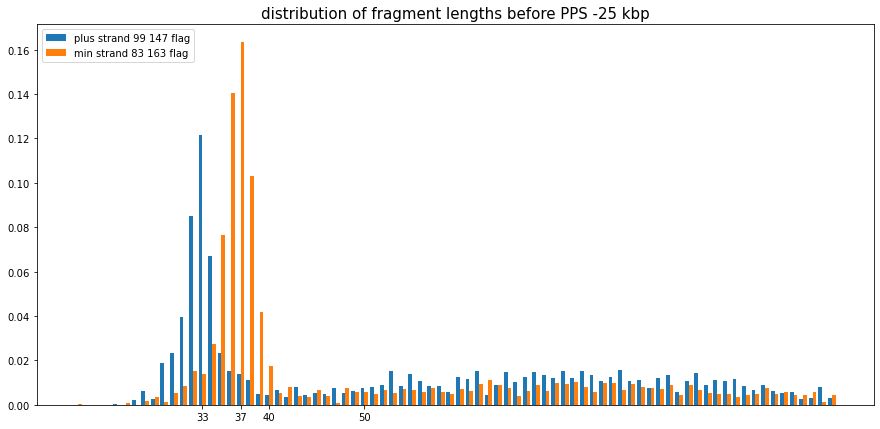

In [24]:
a=[abs(e) for e in list(dff_len_dir_99_147["isize"])]
#b=list(dff_3["isize"])*(+1)
b = [abs(e) for e in list(dff_len_dir_83_163["isize"])]

#bins = np.linspace(1, 100, 100)[19:50] - 0.5
bins = np.linspace(1, 100, 100)[19:100] - 0.5
#bins = np.linspace(1, 100, 100) - 0.5


fig = plt.figure(figsize=(15,7), facecolor = "white")
plt.title(u'distribution of fragment lengths before PPS -25 kbp', fontsize=15)
plt.hist([a, b], bins, label=['plus strand 99 147 flag', 'min strand 83 163 flag'], density = True)
#plt.xticks([20, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 50])
plt.xticks([33, 37, 40, 50])
plt.legend(loc='upper left')
plt.show(fig) 

In [43]:
#path_to_save = ""
#fig.savefig(path_to_save, dpi=200)